In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
breast = load_breast_cancer() #importing breast cancer dataset

In [3]:
breast_data = breast.data #loading data
breast_data.shape #outputting dimensions of breast cancer dataset

(569, 30)

In [4]:
breast_input = pd.DataFrame(breast_data) #transforming data into a dataframe
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
breast_labels = breast.target #loading output
breast_labels.shape

(569,)

In [6]:
labels = np.reshape(breast_labels, (569, 1))

In [7]:
final_breast_data = np.concatenate([breast_data, labels], axis = 1) #adding outputs to dataset

In [8]:
final_breast_data.shape

(569, 31)

In [9]:
breast_dataset = pd.DataFrame(final_breast_data) #transforming final dataset into dataframs

In [10]:
features = breast.feature_names #output feature names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
features_labels = np.append(features, 'label') #adding label header

In [12]:
breast_dataset.columns = features_labels #adding features and label to dataset

In [13]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [14]:
X = breast_dataset.iloc[:, range(30)] #input
Y = breast_dataset.iloc[:, 30] #output

In [15]:
#split data set into X and Y training and testing sets
from sklearn.model_selection import train_test_split

np.random.seed(0)
#splitting 80% data for training, 20% data for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [16]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

#Standardizing the parameters so they are all equally weighted during training
scalerStand = StandardScaler()
X_train = scalerStand.fit_transform(X_train)
X_test = scalerStand.fit_transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression

#preforming logistic regression on the training set
np.random.seed(0)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [18]:
#using the Logistic regression model to predict the output of testing set
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
#Creating a confusion matrix that compares predicted values to actual values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [20]:
#Printing the accuracy, precision, and recall
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433


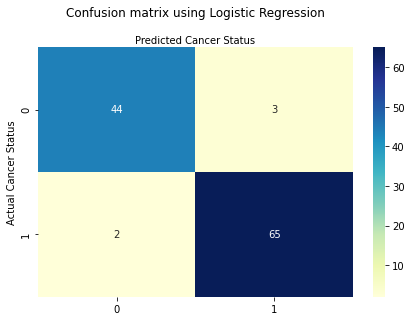

In [21]:
#Plotting Confusion Matrix of predicted vs actual values
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix using Logistic Regression', y=1.1) 
plt.ylabel('Actual Cancer Status') 
plt.xlabel('Predicted Cancer Status') ;

In [22]:
X = scalerStand.fit_transform(X) #standardizing inputs

In [23]:
#creating matrices for accuracy, precision, and recall
acc_score = []
precision_score = []
recall_score = []

In [24]:
from sklearn.decomposition import PCA
N = 30 #components
#for loop to iterate through pca with n components
for x in range(N):
    if x <= 1: #PCA does not work when N <= 1
        acc_score.append(0)
        precision_score.append(0)
        recall_score.append(0)
    else:
        #Performing PCA on dataset inputs
        pca = PCA(n_components=x) 
        principalComponents = pca.fit_transform(X) 
        breast_dataset_pca = pd.DataFrame(data = principalComponents) 
        final_breast_dataset_pca = pd.concat([breast_dataset_pca, breast_dataset[['label']]], axis = 1)
        
        X2 = final_breast_dataset_pca.iloc[:, range(x)]
        Y2 = final_breast_dataset_pca.iloc[:, x]
    
        np.random.seed(0)
        #80% data for training, 20% data for testing
        X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.20, random_state = 42)
    
        #performing logistic regression on the dataset PCA
        classifier.fit(X2_train, Y2_train)
        Y2_pred = classifier.predict(X2_test)
    
        acc = metrics.accuracy_score(Y2_pred, Y2_test)
        acc_score.append(acc)
        
        pres = metrics.precision_score(Y2_pred, Y2_test)
        precision_score.append(pres)
    
        recall = metrics.recall_score(Y2_pred, Y2_test)
        recall_score.append(recall)

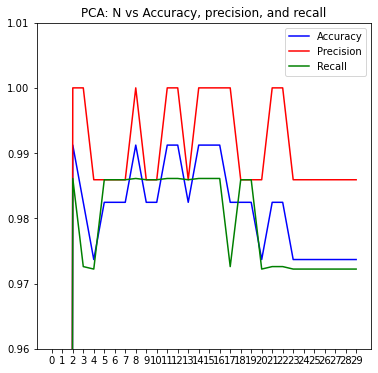

In [25]:
#plot PCA: N vs Accuracy, precision, and recall
n = np.array( range(N))
fig, ax = plt.subplots(figsize =(6, 6))
plt.title("PCA: N vs Accuracy, precision, and recall")
plt.xticks(range(N))
plt.plot(n, acc_score, color = 'blue', label = 'Accuracy')
plt.plot(n, precision_score, color = 'red', label = 'Precision')
plt.plot(n, recall_score, color = 'green', label = 'Recall')
plt.legend()
plt.ylim([0.96, 1.01])
plt.show()

In [26]:
######################Problem 3################

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#performing LDA on the dataset
lda = LinearDiscriminantAnalysis(n_components=1) 
principalComponents = lda.fit_transform(X, Y) 
breast_dataset_lda = pd.DataFrame(data = principalComponents) 
final_breast_dataset_lda = pd.concat([breast_dataset_lda, breast_dataset[['label']]], axis = 1)

np.random.seed(0)
#80% data for training, 20% data for testing
lda_train, lda_test = train_test_split(final_breast_dataset_lda, test_size = 0.20, random_state = 0)

#splitting inputs and output
X_trainlda = lda_train.loc[:, 0].values
Y_trainlda = lda_train.loc[:, ['label']].values

X_testlda = lda_test.loc[:, 0].values
Y_testlda = lda_test.loc[:, ['label']].values

In [28]:
from sklearn.naive_bayes import GaussianNB

#performing gaussian naive bayes on the dataset after LDA
classifierG = GaussianNB()
classifierG.fit(X_trainlda.reshape(-1, 1), Y_trainlda.ravel())
Y_predlda = classifierG.predict(X_testlda.reshape(-1,1))

In [29]:
#printing the accuracy, precision, and recall
print("Accuracy:",metrics.accuracy_score(Y_testlda, Y_predlda)) 
print("Precision:",metrics.precision_score(Y_testlda, Y_predlda)) 
print("Recall:",metrics.recall_score(Y_testlda, Y_predlda))

Accuracy: 0.9736842105263158
Precision: 0.9705882352941176
Recall: 0.9850746268656716


In [30]:
np.random.seed(0)
#80% data for training, 20% data for testing
lda2_train, lda2_test = train_test_split(final_breast_dataset_lda, test_size = 0.20, random_state = 42)

#splitting inputs and outputs
X2_trainlda = lda2_train.loc[:, 0].values
Y2_trainlda = lda2_train.loc[:, ['label']].values

X2_testlda = lda2_test.loc[:, 0].values
Y2_testlda = lda2_test.loc[:, ['label']].values

#performing logistic regression on the dataset after lda
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X2_trainlda.reshape(-1, 1), Y2_trainlda.ravel())
Y_predlda2 = classifier2.predict(X2_testlda.reshape(-1,1))

#printing the accuracy, regression, and recall
print("Accuracy:",metrics.accuracy_score(Y2_testlda, Y_predlda2)) 
print("Precision:",metrics.precision_score(Y2_testlda, Y_predlda2)) 
print("Recall:",metrics.recall_score(Y2_testlda, Y_predlda2))

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
